# Individual Project: San Jose Police Calls Data Sorting

Hello! Welcome to my personal project to expand my knowledge of Python (with NumPy, Pandas, and Matplotlib) by doing this project on San Jose's Police Calls in 2019. I am using my knowledge from Data 8 (Foundations of Data Science) and CS61A (Structures and Intepreations of Computer Programs) from UC Berkeley. This project aims to dissect a real world dataset and find any underlying patterns or observations that can be useful for the audience through sorting, visualization, and analysis of the data

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime

The police call dataset can be found at https://data.sanjoseca.gov/dataset/police-calls-for-service. For this project, I will be using the 2019 dataset.

In [5]:
policecalls = pd.read_csv("policecalls2019.csv") 
policecalls

,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,CALL_TYPE,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE
0,20190111170312PS,7501469,1/11/2019 12:00:00 AM,P190110522,2,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,13:43:45,415A,"DISTURBANCE, FIGHT",N,No report required; dispatch record only,NaN,[1800]-[1900] LUKE CT,San Jose,CA
1,20190111170443PS,7501506,1/11/2019 12:00:00 AM,P190110547,3,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,14:18:48,422,CRIMINAL THREATS,N,No report required; dispatch record only,NaN,[1300]-[1400] E SAN ANTONIO ST,San Jose,CA
2,20190111170559PS,7501593,1/11/2019 12:00:00 AM,P190110619,3,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,15:28:38,484,THEFT,N,No report required; dispatch record only,TARGET,[500]-[600] COTTLE RD,San Jose,CA
3,20190111170607PS,7501684,1/11/2019 12:00:00 AM,P190110689,1,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,16:58:10,415W,"DISTURBANCE, WEAPON",N,No report required; dispatch record only,NaN,[300]-[400] BIRD AV,San Jose,CA
4,20190111170951PS,7501658,1/11/2019 12:00:00 AM,P190110670,2,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,16:30:37,415,DISTURBANCE,G,Gone on Arrival/unable to locate,NaN,E WILLIAM ST & S 5TH ST,San Jose,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305482,20190215090352PS,7545833,2/15/2019 12:00:00 AM,P190460205,3,2/15/2019 12:00:00 AM,2/15/2019 12:00:00 AM,09:00:42,1033A,"ALARM, AUDIBLE",CAN,Canceled,NaN,[900]-[1000] BLOSSOM HILL RD,San Jose,CA
305483,20190215090013PS,7545727,2/15/2019 12:00:00 AM,P190460124,2,2/15/2019 12:00:00 AM,2/15/2019 12:00:00 AM,06:48:54,911UNK,UNK TYPE 911 CALL,N,No report required; dispatch record only,NaN,[0]-[100] N 2ND ST,San Jose,CA
305484,20190215090020PS,7545788,2/15/2019 12:00:00 AM,P190460169,3,2/15/2019 12:00:00 AM,2/15/2019 12:00:00 AM,08:13:58,459VEH,VEHICLE BURGLARY,R,Report taken,NaN,[1200]-[1300] KOTENBERG AV,San Jose,CA
305485,20190215090224PS,7545810,2/15/2019 12:00:00 AM,P190460185,3,2/15/2019 12:00:00 AM,2/15/2019 12:00:00 AM,08:36:41,1033A,"ALARM, AUDIBLE",CAN,Canceled,NaN,[4200]-[4300] MCKINNON DR,San Jose,CA


Below, I am renaming one of the columns to make it easier to reference when coding for the other parts. 

In [6]:
new_table = policecalls.rename(columns={"CALL_TYPE": "Type"})

To determine the frequency of calls each offense type has, we need to group the types from our dataset and total the amount of times it appears 

In [7]:
grouped = new_table['Type'].value_counts().to_frame().reset_index()
grouped.columns = ['Type','Count']
grouped

,Type,Count
0,DISTURBANCE,28775
1,VEHICLE STOP,25723
2,"ALARM, AUDIBLE",23674
3,WELFARE CHECK,18768
4,PARKING VIOLATION,18727
...,...,...
197,"BOMB REMOVAL, STANDBY",1
198,PETTY THEFT PRIOR CONVICTION,1
199,"VEHICLE STOP ON X, SEND FILL",1
200,NOISY ANIMAL,1


As told in this table, we see that disturbances was the offense that had the highest frequency of calls while vehicle stops was a close second. It is important to point out that there are also subcategories of disturbances in the data set, and so the disturbance in referenece is general disturbances with no associated categories. To see a list of all types of offensives, please refer to the table below

In [8]:
sorted(grouped["Type"])

['1091AB          - VICIOUS ANIMAL (COMBINED EVENT)',
 'ABANDONED VEHICLE',
 'ALARM',
 'ALARM, AUDIBLE',
 'ALARM, SILENT',
 'ALARM, SVRN',
 'ANIMAL COMPLAINT',
 'ARMED ROBBERY',
 'ARMED ROBBERY (COMBINED EVENT)',
 'ARMED ROBBERY, GANG RELATED',
 'ARSON (447A)',
 'ASSAULT',
 'ASSAULT AND BATTERY',
 'ASSAULT ON AN OFFICER',
 'ASSAULT WITH DEADLY WEAPON',
 'ASSAULT WITH DEADLY WEAPON (COMBINED EVENT)',
 'ASSAULT WITH DEADLY WEAPON, GANG',
 'BAD CHECKS',
 'BAR CHECK',
 'BATTERY',
 'BATTERY (COMBINED EVENT)',
 'BATTERY ON A PEACE OFFICER',
 'BATTERY ON AN OFFICER',
 'BATTERY, GANG RELATED',
 'BATTERY, SERIOUS INJURY',
 'BOMB REMOVAL, STANDBY',
 'BOMB THREAT',
 'BRANDISHING A WEAPON',
 'BRANDISHING A WEAPON, GANG',
 'BREACH OF AOA',
 'BURGLARY  REPORT  (460)',
 'BURGLARY (460)',
 'CARJACKING (COMBINED EVENT)',
 'CARRYING A CONCEALED WEAPON',
 'CHILD ABUSE',
 'CHILD BEATING',
 'CIVIL MATTER',
 'COMMUNIT POLICING BIKE',
 'COMMUNITY POLICING -CITZ ASSIST',
 'COMMUNITY POLICING MEETING',
 'COMMU

To view the top ten offensives that were called on, we can make a table that displays the top types.

In [9]:
top_recorded = grouped.sort_values("Count", ascending = False).head(10)
top_recorded

,Type,Count
0,DISTURBANCE,28775
1,VEHICLE STOP,25723
2,"ALARM, AUDIBLE",23674
3,WELFARE CHECK,18768
4,PARKING VIOLATION,18727
5,SUSPICIOUS VEHICLE,12644
6,"DISTURBANCE, FAMILY",10329
7,SUSPICIOUS PERSON,8355
8,PEDESTRIAN STOP,7582
9,UNK TYPE 911 CALL,7564


To visualize these top offensives, we can use a bar graph to show the comparisons between each offense.

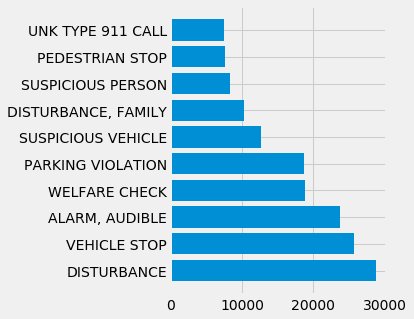

In [10]:
recorded_figures = plt.figure()
axes = recorded_figures.add_axes([0,0,0.5,1])
axes.barh(top_recorded["Type"],top_recorded["Count"])
plt.show()

In [15]:
disturbance_calls = new_table.loc[new_table["Type"].str.contains("DISTURBANCE", na=False, regex=True)]

In [16]:
disturbance_calls.shape[0]

54297

In total, 54297 of the calls that were made in 2019 were disturbances (both general and subcategorical).

# Looking into Disturbances

We can take a closer look into the disturbance calls and find patterns and other information. However, we must first format the timestamp from our dataset because they are currently strings. We are formating these timestamps in order to be able to use them to see the disturbance cases per month

In [17]:
disturbance_calls["START_DATE"].value_counts()

7/27/2019 12:00:00 AM     2420
3/17/2019 12:00:00 AM      385
7/4/2019 12:00:00 AM       335
8/24/2019 12:00:00 AM      286
10/19/2019 12:00:00 AM     280
                          ... 
11/27/2019 12:00:00 AM     103
11/25/2019 12:00:00 AM      99
2/13/2019 12:00:00 AM       96
12/2/2019 12:00:00 AM       94
2/21/2019 12:00:00 AM       91
Name: START_DATE, Length: 329, dtype: int64

In [18]:
x = disturbance_calls["START_DATE"].tolist()
timestamp_conversion = []
for i in x:
    updated_time = datetime.strptime(i,"%m/%d/%Y %I:%M:%S %p").month
    timestamp_conversion.append(updated_time)

In [19]:
disturbance_calls["Months"] = timestamp_conversion
disturbance_calls

C:\Users\huynh\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,CDTS,EID,START_DATE,CALL_NUMBER,PRIORITY,REPORT_DATE,OFFENSE_DATE,OFFENSE_TIME,CALLTYPE_CODE,Type,FINAL_DISPO_CODE,FINAL_DISPO,COMMON_PLACE_NAME,ADDRESS,CITY,STATE,Months
0,20190111170312PS,7501469,1/11/2019 12:00:00 AM,P190110522,2,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,13:43:45,415A,"DISTURBANCE, FIGHT",N,No report required; dispatch record only,NaN,[1800]-[1900] LUKE CT,San Jose,CA,1
3,20190111170607PS,7501684,1/11/2019 12:00:00 AM,P190110689,1,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,16:58:10,415W,"DISTURBANCE, WEAPON",N,No report required; dispatch record only,NaN,[300]-[400] BIRD AV,San Jose,CA,1
4,20190111170951PS,7501658,1/11/2019 12:00:00 AM,P190110670,2,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,16:30:37,415,DISTURBANCE,G,Gone on Arrival/unable to locate,NaN,E WILLIAM ST & S 5TH ST,San Jose,CA,1
13,20190111172621PS,7501677,1/11/2019 12:00:00 AM,P190110682,2,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,16:51:28,415F,"DISTURBANCE, FAMILY",R,Report taken,NaN,[4100]-[4200] ASHBROOK CL,San Jose,CA,1
14,20190111184225PS,7501780,1/11/2019 12:00:00 AM,P190110770,2,1/11/2019 12:00:00 AM,1/11/2019 12:00:00 AM,18:06:08,415F,"DISTURBANCE, FAMILY",N,No report required; dispatch record only,NaN,[2300]-[2400] TOLBERT CT,San Jose,CA,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305457,20190215064341PS,7545721,2/15/2019 12:00:00 AM,P190460119,2,2/15/2019 12:00:00 AM,2/15/2019 12:00:00 AM,06:34:54,415,DISTURBANCE,CAN,Canceled,KSJ,[0]-[100] HOSPITAL PY,San Jose,CA,2
305464,20190215074005PS,7545736,2/15/2019 12:00:00 AM,P190460130,5,2/15/2019 12:00:00 AM,2/15/2019 12:00:00 AM,07:02:38,415,DISTURBANCE,N,No report required; dispatch record only,NaN,[100]-[200] W REED ST,San Jose,CA,2
305466,20190215081702PS,7545720,2/15/2019 12:00:00 AM,P190460118,3,2/15/2019 12:00:00 AM,2/15/2019 12:00:00 AM,06:33:36,415,DISTURBANCE,G,Gone on Arrival/unable to locate,NaN,N MONTGOMERY ST & W JULIAN ST,San Jose,CA,2
305467,20190215074959PS,7545741,2/15/2019 12:00:00 AM,P190460134,3,2/15/2019 12:00:00 AM,2/15/2019 12:00:00 AM,07:08:09,415,DISTURBANCE,G,Gone on Arrival/unable to locate,NaN,MCLAUGHLIN AV & MELBOURNE BL,San Jose,CA,2


After formating the timestamps, we are now able to look into the disturbance cases per month by grouping the months and cases. 

In [20]:
what = disturbance_calls["Months"].value_counts().to_frame().reset_index()
what.columns = ['Month','Cases']
tbls = what.sort_values("Month", ascending = True)
tbls

,Month,Cases
9,1,4271
10,2,3795
7,3,4481
6,4,4765
5,5,4929
1,6,5419
0,7,6645
2,8,5314
3,9,5005
4,10,4943


Now, we can plot our the disturbance calls per month to visualize the changes in calls and to determine which month had the highest amount of calls. 

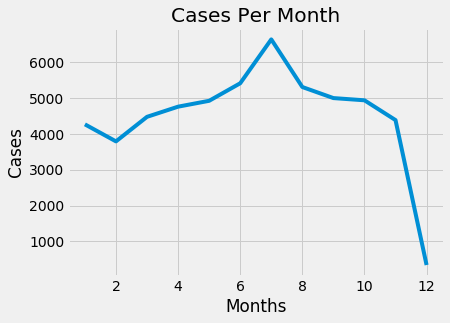

In [21]:
cases_per_month_table = plt.figure()
cases_per_month_table.subplots_adjust(top=3)
ax1 = cases_per_month_table.add_subplot(311)
ax1.set_ylabel('Cases')
ax1.set_xlabel('Months')
ax1.set_title('Cases Per Month')
ax1.plot(tbls["Month"],tbls["Cases"])
plt.show()


As seen in the graph, the frequency of calls increased from Feburary to its peak in July but then starts to decrease  until January with the lowest frequency of calls in December. 

Now, let's look into the subcategories of disturbances and determine which category had the highest frequnecy of calls

In [22]:
type_cases= disturbance_calls["Type"].value_counts().to_frame().reset_index()
type_cases.columns = ['Disturbance Type','Cases']
type_cases

,Disturbance Type,Cases
0,DISTURBANCE,28775
1,"DISTURBANCE, FAMILY",10329
2,"DISTURBANCE, MUSIC",6904
3,"DISTURBANCE, UNKNOWN",1718
4,"DISTURBANCE, WEAPON",1451
5,"DISTURBANCE, NEIGHBOR",1406
6,"DISTURBANCE, FIGHT",1333
7,"DISTURBANCE, FIRECRACKERS",983
8,DISTURBANCE (COMBINED EVENT),426
9,"DISTURBANCE, JUVENILE",357


Seen in the table, Family disturbances had the highest frequnecy of calls under general disturbance. We can visualize the comparison between each categories in the bar chart below

<BarContainer object of 17 artists>

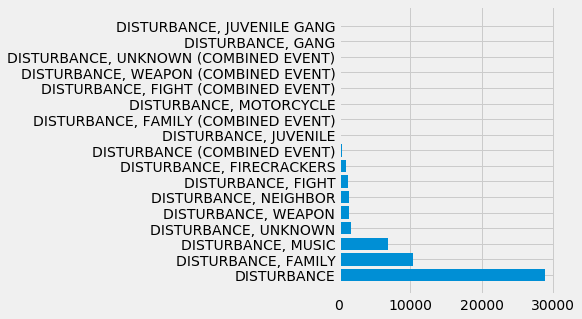

In [23]:
fig = plt.figure()
ax = fig.add_axes([0,1,0.5,1])
ax.barh(type_cases["Disturbance Type"],type_cases["Cases"])

In [32]:
family_disturbance_calls = new_table.loc[new_table["Type"].str.contains("DISTURBANCE, FAMILY", na=False, regex=True)].shape[0]
family_disturbance_calls

10588

In [33]:
family_disturbance_calls/policecalls.shape[0]

0.03465941267549846

Of the total 54297 disturbance calls, 10588 were family disturbances (3.4% of calls)

# Actions Followed

In [26]:
table = pd.pivot_table(disturbance_calls, values = None,index=["Type"], columns=['FINAL_DISPO'], aggfunc = "count")
table

ADDRESS                             \
FINAL_DISPO                           Arrest Made Arrest by Warrant Canceled   
Type                                                                           
DISTURBANCE                                 137.0              93.0   5864.0   
DISTURBANCE (COMBINED EVENT)                  8.0               1.0     41.0   
DISTURBANCE, FAMILY                         140.0              48.0   1286.0   
DISTURBANCE, FAMILY (COMBINED EVENT)          7.0               NaN     17.0   
DISTURBANCE, FIGHT                            7.0               3.0    111.0   
DISTURBANCE, FIGHT (COMBINED EVENT)           1.0               NaN      5.0   
DISTURBANCE, FIRECRACKERS                     NaN               NaN    574.0   
DISTURBANCE, GANG                             NaN               NaN      NaN   
DISTURBANCE, JUVENILE                         NaN               NaN    122.0   
DISTURBANCE, JUVENILE GANG                    NaN               NaN      NaN   
DISTURBANCE, MOTORCYCLE                       NaN               NaN     58.0   
DISTURBANCE, MUSIC                            1.0               3.0   3418.0   
DISTURBANCE, NEIGHBOR                         1.0               2.0    218.0   
DISTURBANCE, UNKNOWN                          4.0               1.0    289.0   
DISTURBANCE, UNKNOWN (COMBINED EVENT)         NaN               NaN      6.0   
DISTURBANCE, WEAPON                          38.0               6.0     67.0   
DISTURBANCE, WEAPON (COMBINED EVENT)          2.0               NaN      3.0   

                                                                                 \
FINAL_DISPO                           Courtesy Service/Citizen or agency assist   
Type                                                                              
DISTURBANCE                                                               302.0   
DISTURBANCE (COMBINED EVENT)                                                NaN   
DISTURBANCE, FAMILY                                                       114.0   
DISTURBANCE, FAMILY (COMBINED EVENT)                                        6.0   
DISTURBANCE, FIGHT                                                          4.0   
DISTURBANCE, FIGHT (COMBINED EVENT)                                         NaN   
DISTURBANCE, FIRECRACKERS                                                   NaN   
DISTURBANCE, GANG                                                           1.0   
DISTURBANCE, JUVENILE                                                       1.0   
DISTURBANCE, JUVENILE GANG                                                  NaN   
DISTURBANCE, MOTORCYCLE                                                     NaN   
DISTURBANCE, MUSIC                                                         18.0   
DISTURBANCE, NEIGHBOR                                                      36.0   
DISTURBANCE, UNKNOWN                                                        5.0   
DISTURBANCE, UNKNOWN (COMBINED EVENT)                                       NaN   
DISTURBANCE, WEAPON                                                         6.0   
DISTURBANCE, WEAPON (COMBINED EVENT)                                        NaN   

                                                         \
FINAL_DISPO                           Criminal Citation   
Type                                                      
DISTURBANCE                                        58.0   
DISTURBANCE (COMBINED EVENT)                        7.0   
DISTURBANCE, FAMILY                                10.0   
DISTURBANCE, FAMILY (COMBINED EVENT)                1.0   
DISTURBANCE, FIGHT                                  3.0   
DISTURBANCE, FIGHT (COMBINED EVENT)                 2.0   
DISTURBANCE, FIRECRACKERS                           1.0   
DISTURBANCE, GANG                                   NaN   
DISTURBANCE, JUVENILE                               1.0   
DISTURBANCE, JUVENILE GANG                          NaN   
DISTURBANCE, 

In [27]:
dispo= disturbance_calls["FINAL_DISPO"].value_counts().to_frame().reset_index()
dispo.columns = ["Type Of Action",'Amount']
dispo

,Type Of Action,Amount
0,No report required; dispatch record only,30144
1,Canceled,12419
2,Gone on Arrival/unable to locate,6202
3,No Disposition,1679
4,Report taken,1044
5,No Response,650
6,Courtesy Service/Citizen or agency assist,494
7,Unfounded event,406
8,Arrest Made,349
9,Turned over To (TOT),299


In [30]:
dispo["Amount"].iloc[0]/new_table.shape[0]

0.09867523004252227

In [31]:
(dispo["Amount"].iloc[8] + dispo["Amount"].iloc[11])/new_table.shape[0]

0.001666192014717484

In total, 9.8% of police calls had no report required while 0.1% of calls resulted in an arrest.